<a href="https://colab.research.google.com/github/recozers/TQBFJOTLD/blob/main/XAI_GPT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XAI for GPT-2 with pertubations
In this notebook we will use pertubations to try and understand how GPT-2 creates outputs based on different prompts. First we need to load in the model and choose a good baseline sentence. I will start with "the quick brown fox jumps over the lazy dog". First because it contains every letter in the alphabet, but also because foxes aren't generally brown and the mental image it brings up are quite ridiculous.

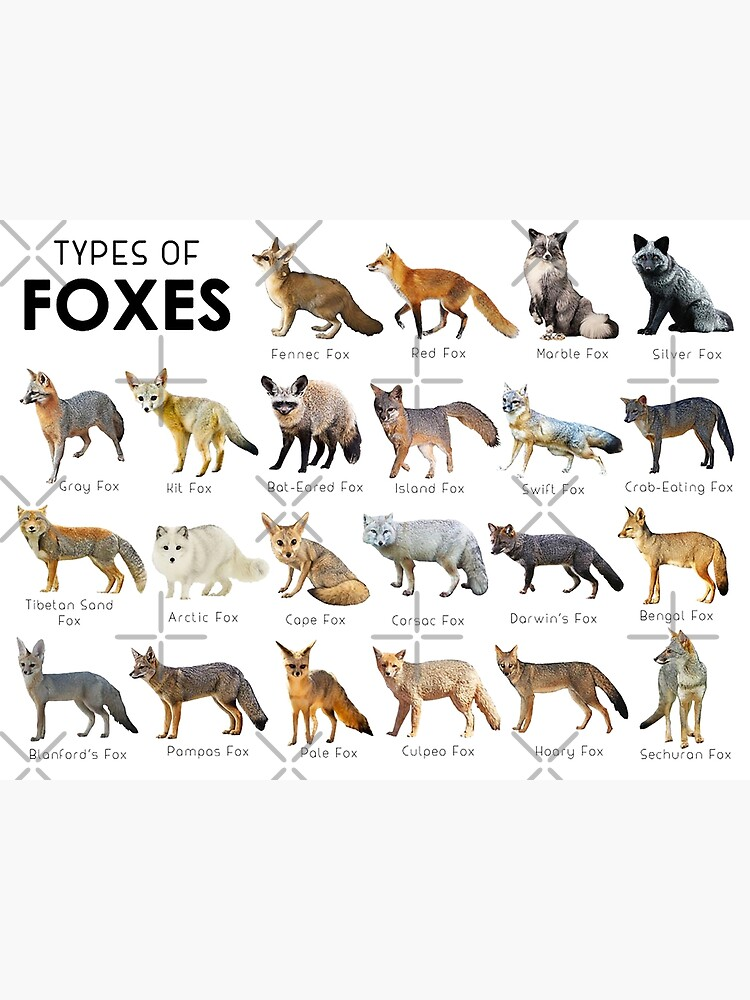

Very few of these could be described as brown...

In [59]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

input_text = "the quick brown fox jumps over the lazy dog"
inputs = tokenizer(input_text, return_tensors="pt")
input_ids = inputs["input_ids"]

output = model.generate(input_ids, max_length=30, num_return_sequences=1, attention_mask=inputs["attention_mask"])

generated_text = tokenizer.decode(output[0], skip_special_tokens=False)
print("")
print(generated_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



the quick brown fox jumps over the lazy dog and runs off.

"I'm sorry, I'm sorry, I'm sorry, I'm


The base output is as expected. Aside from the fox repeatedly apologising for leaping over the hapless canine. What if we were to change the sentence ever so slightly so the dog was the one jumping, and also the brown one (there are many many more brown dogs than brown foxes). Lets make a functiuon for generating the output given we're going to be doing this a lot.

In [60]:
def gen_text(input, length):
  input_text = input
  inputs = tokenizer(input_text, return_tensors="pt")
  input_ids = inputs["input_ids"]

  output = model.generate(input_ids, max_length=length, num_return_sequences=1, attention_mask=inputs["attention_mask"])

  generated_text = tokenizer.decode(output[0], skip_special_tokens=False)

  return generated_text

In [61]:
print(gen_text("the quick brown dog jumps over the lazy dog",100))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick brown dog jumps over the lazy dog and the lazy dog jumps over the lazy dog.

The dog jumps over the lazy dog and the lazy dog jumps over the lazy dog.

The dog jumps over the lazy dog and the lazy dog jumps over the lazy dog.

The dog jumps over the lazy dog and the lazy dog jumps over the lazy dog.

The dog jumps over the lazy dog and the lazy dog jumps over the lazy dog.

The dog jumps


Now we appear to be stuck in a recursive loop where the lazy fox jumps over himself after seeing the brown dog do so first. I increased the token length to demostrate this. GPT-2 is known to be quite repetitive so this isn't that surprising. Lets now try really small pertubations by changing jump the capitalisation of the first letters of each word.

## Capitalisation

In [62]:
input_text = "the quick brown fox jumps over the lazy dog"
words = input_text.split()
for index, word in enumerate(words):
  word = word.capitalize()
  words[index] = word
  sentence = ' '.join(words)
  print(gen_text(sentence,50))
  words = input_text.split()
  print("-------------------")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The quick brown fox jumps over the lazy dog and runs off.

"I'm sorry, I'm sorry, I'm sorry," the fox says.

"I'm sorry, I'm sorry, I'm sorry," the fox says
-------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the Quick brown fox jumps over the lazy dog and runs off.

The dog is not injured.

The dog is not injured.

The dog is not injured.

The dog is not injured.

The dog is
-------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick Brown fox jumps over the lazy dog and the dog is left to fend for itself.

The dog is then left to fend for itself.

The dog is then left to fend for itself.

The dog is then left
-------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick brown Fox jumps over the lazy dog and the lazy dog jumps over the lazy dog.

The lazy dog is the one who is the one who is the one who is the one who is the one who is the one who is the
-------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick brown fox Jumps over the lazy dog.

"I'm sorry, but I'm not going to be able to do this."

"I'm sorry, but I'm not going to be able to do this."

-------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick brown fox jumps Over the lazy dog, the lazy dog jumps Over the lazy dog, the lazy dog jumps Over the lazy dog, the lazy dog jumps Over the lazy dog, the lazy dog jumps Over the lazy dog, the lazy dog jumps
-------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick brown fox jumps over The lazy dog, and the lazy dog jumps over The lazy dog, and the lazy dog jumps over The lazy dog, and the lazy dog jumps over The lazy dog, and the lazy dog jumps over The lazy dog,
-------------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick brown fox jumps over the Lazy dog and runs off.

"I'm sorry, I'm sorry, I'm sorry," she says. "I'm sorry, I'm sorry. I'm sorry, I'm sorry. I
-------------------
the quick brown fox jumps over the lazy Dog and runs off.

"I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm
-------------------


As we can see from the above outputs, the model is not robust to even the slightest pertubations. However some make a bigger difference than others. For example capitalisations to 'The', 'Lazy' and 'Dog' don't alter the output at all. Capitalisations to 'Over and the second 'The' appear to make a small difference. 'Quick', 'Brown','Fox' and 'Jumps' completely alter the model output. This would suggest that these are some of the important input words. Lets explore this hypothesis by altering them to words the have the same meaning to us, but might be different to LLMs.

## Alternative words

In [66]:
print(gen_text("the fast brown fox jumps over the lazy dog",50))
print("----------------")
print(gen_text("the quick beige fox jumps over the lazy dog",50))
print("----------------")
print(gen_text("the quick brown coyote jumps over the lazy dog",50))
print("----------------")
print(gen_text("the quick brown fox leaps over the lazy dog",50))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the fast brown fox jumps over the lazy dog and the lazy dog jumps over the lazy dog.

The lazy dog jumps over the lazy dog and the lazy dog jumps over the lazy dog.

The lazy dog jumps over the lazy dog and
----------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick beige fox jumps over the lazy dog and runs off.

The dog is not happy with the dog, but the fox is not happy with the fox.

The dog is not happy with the dog, but the fox is
----------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick brown coyote jumps over the lazy dog and runs off.

"I'm not sure if it's a good idea to have a coyote in your home," said the coyote's owner, who asked not to be named.
----------------
the quick brown fox leaps over the lazy dog and runs off.

"I'm sorry, I'm sorry, I'm sorry," she says. "I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm


Here we see that changing jumps to leaps made no difference. Changing quick to fast resulted in an output we've seen earlier. Changing fox to Coyote made the biggest difference with the model giving us some unwarranted but potentially very insightful advice. This would usggest that fox is the most important part of this sentence in relation to model output.

## Symbols/special characters

Lets have a quick look at injecting some special characters and see how that impacts the model.

In [69]:
print(gen_text("the quick brown fox jumps? over the lazy dog",50))
print("----------------")
print(gen_text("the quick brown fox? jumps over the lazy dog",50))
print("----------------")
print(gen_text("the quick brown? fox jumps over the lazy dog",50))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick brown fox jumps? over the lazy dog?

The fox is a very good dog. It is very good at handling and handling other dogs. It is very good at handling other dogs. It is very good at handling other dogs.
----------------


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick brown fox? jumps over the lazy dog and runs off.

"I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I
----------------
the quick brown? fox jumps over the lazy dog and runs off.

"I'm sorry, fox," she says. "I'm sorry, fox."

"I'm sorry, fox," he says. "I'm sorry,


Here we see the question mark making no difference when placed after the fox, challenging our idea that fox was the most important word. Placing it after brown also makes very little difference. After jumps however we see a big difference. LLMs don't see individual words so perhaps trying to identify the most improtant word is the wrong approach. The 'fox jumps' part of the sentence now seems to be the important bit.

## Try your own pertubations below:

In [71]:
text = "the quick brown fox jumps over the lazy dog" #alter this part

print(gen_text(text,50))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


the quick brown fox jumps over the lazy dog and runs off.

"I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm sorry, I'm


To conclude, when GPT-2 is given the sentence "the quick brown fox jumps over the lazy dog", it seems to pay most attention to the "fox jumps" part of the sentence. We tried perturbing the sentence by altering capitalisation, tryting alternative words, and even injecting question marks after different words. I would have to conclude that overall the model is not robust to pertubations as a whole, but its certainly more vulnerable for some words than others. A better way to investigate this would be to have a direct measure of how much the output changes rather than simply looking at it and making a judgement call. Typically this has been done by using sentiment analysis but i dont think that makes much sense in this situation.